# Lab 11: K Means Clusters

In [1]:
import matplotlib as plt
import matplotlib.animation

import pandas as pd
import numpy as np
import pylab as pl
from IPython.display import display, clear_output
import time
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


___
## K Means Lab

In [2]:
np.random.seed(333)

In [3]:
random_1=np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2, 100) + 2

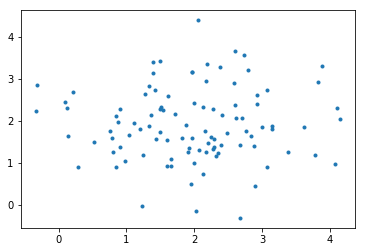

In [6]:
pl.plot(random_2[0], random_2[1],'.')

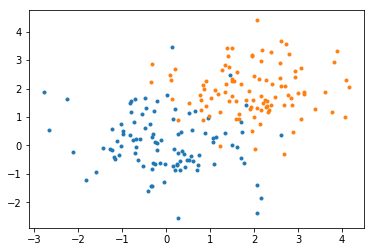

In [7]:
plot(random_1[0], random_1[1],'.')
plot(random_2[0], random_2[1],'.')

# 1. Choose the number of clusters

In [8]:
clusters=2
random_stack = np.hstack([random_1, random_2])

# 2. Set a guess for the initial centers

In [18]:
min(random_stack[0]), max(random_stack[0])
centers = np.array([[0.,-1.], [0,-2]]) 
#np.array((np.random.rand(4)   * (max(random_stack[0]) - min(random_stack[0]))) + min(random_stack[0])).reshape(2,2)

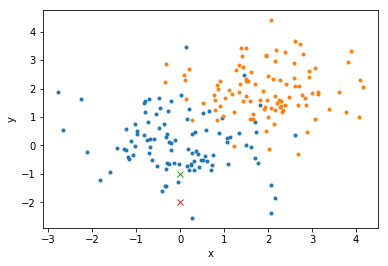

In [10]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.plot(centers[0,0], centers[0,1],'x')
pl.plot(centers[1,0], centers[1,1],'x')
pl.xlabel('x')
pl.ylabel('y');

These centers are awful. let's make them better.

In [11]:
def distmetric(x, y, centers):
    distmetric = np.sqrt((x - centers[0])**2 + (y - centers[1])**2)
    return distmetric

# 3. Check for each point which center is closer

In [19]:
# finding the closest distance to centers based on new difference  
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])

print (centers) 
print (newc)

[[ 0. -1.]
 [ 0. -2.]]
[[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# Calculate new centers

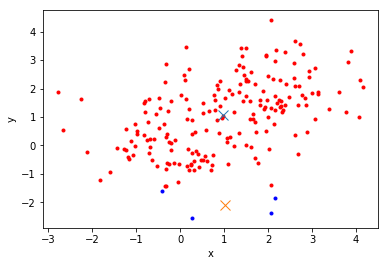

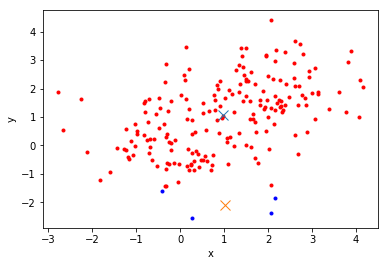

array([ 0.96972306,  1.06522176])

In [24]:
intera = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
              np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
              np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
l3, = ax.plot(centers[0,0], centers [0,1], 'x', ms=10)
l4, = ax.plot(centers[1,0], centers [1,1], 'x', ms=10)

ax.set_xlabel('x')
ax.set_ylabel('y')

display(fig)

while (not (centers == newc).all()) or intera > 10:
    
    #create the new centers
    print("iteration", intera)
    
    #set the new centers as the old centers
    centers = newc
    intera +=1
    
    # clear the axis
    pl.cla()
    
    #plot the new plots
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
    l3.set_data(centers[0,0], centers[0,1], 'x')
    l4.set_data(centers[1,0], centers[1,1], 'x')
    
    #calculate the distances
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    
    #animation
    time.sleep(1)
    clear_output(wait=True)
    display(fig) 
    
    print (centers, newc)
    # define new center
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
plt.show()
newc[0]

Points: 10

Total: 10/10